In [201]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline

import plotly.express as px
import plotly.graph_objects as go

In [5]:
ads_clients_data = pd.read_csv('ads_clients_data.zip', compression='zip', parse_dates=['date', 'create_date'])

In [10]:
ads_clients_data.head()

date  client_union_id  community_id create_date
0 2020-05-07                1    -130371893  2018-12-24
1 2020-05-07                2    -130304626  2019-02-10
2 2020-05-07                3    -130462599  2019-01-25
3 2020-05-07                4    -130574300  2018-12-09
4 2020-05-07                5    -130292358  2019-01-08

In [14]:
ads_data = pd.read_csv('ads_data.zip', compression='zip', parse_dates=['date','time'])

In [15]:
ads_data.head()

date                time event platform   ad_id  client_union_id  \
0 2019-04-01 2019-04-01 00:00:48  view  android   45061            34734   
1 2019-04-01 2019-04-01 00:00:48  view      web  121288           121288   
2 2019-04-01 2019-04-01 00:01:03  view  android  102737           102535   
3 2019-04-01 2019-04-01 00:01:03  view  android  107564           106914   
4 2019-04-01 2019-04-01 00:01:09  view  android    4922               37   

   campaign_union_id ad_cost_type  ad_cost  has_video  target_audience_count  
0              45061          CPM    200.6          0                1955269  
1             121288          CPM    187.4          0                 232011  
2             102564          CPC     60.7          0                   4410  
3             107564          CPM    217.3          0                  62711  
4               4400          CPC     60.1          0                1183501

Step 2 <a href='https://lab.karpov.courses/learning/85/module/1056/lesson/9043/26538/117984/'>link</a>
<br>–î–ª—è –Ω–∞—á–∞–ª–∞ –ø–æ—Å—á–∏—Ç–∞–µ–º —Å—Ä–µ–¥–Ω–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ä–∞–∑–Ω—ã—Ö —Ä–µ–∫–ª–∞–º–Ω—ã—Ö —Å–æ–±—ã—Ç–∏–π (–ø–æ–∫–∞–∑—ã –∏ –∫–ª–∏–∫–∏) –ø–æ –æ–±—ä—è–≤–ª–µ–Ω–∏—è–º. –¢–æ–Ω–∫–∏–π –º–æ–º–µ–Ω—Ç: –ø–æ–º–Ω–∏—Ç–µ, —á—Ç–æ –Ω–µ–∫–æ—Ç–æ—Ä—ã–µ –ø–æ–∫–∞–∑—ã–≤–∞–µ–º—ã–µ –æ–±—ä—è–≤–ª–µ–Ω–∏—è –Ω–µ –∫–ª–∏–∫–∞–ª–∏—Å—å, –∏ –ø—Ä–∏ –≥—Ä—É–ø–ø–∏—Ä–æ–≤–∫–µ –≤ —Ç–∞–∫–∏—Ö —Å–ª—É—á–∞—è—Ö –Ω–µ –±—É–¥–µ—Ç —Å—Ç—Ä–æ–∫ —Å –∫–ª–∏–∫–∞–º–∏, –∞ –¥–ª—è –ø–æ–¥—Å—á—ë—Ç–∞ —Å—Ä–µ–¥–Ω–µ–≥–æ –ø–æ –æ–±—ä—è–≤–ª–µ–Ω–∏—è–º –∏—Ö –Ω—É–∂–Ω–æ —É—á–∏—Ç—ã–≤–∞—Ç—å. –û–∫—Ä—É–≥–ª–∏—Ç–µ –æ—Ç–≤–µ—Ç—ã –¥–æ —Ü–µ–ª—ã—Ö —á–∏—Å–µ–ª.

In [46]:
pivot_ads = ads_data.groupby(by=['ad_id', 'event'], as_index=False) \
    .agg({'date':'count'}) \
    .rename(columns={'date':'event_counts'}) \
    .pivot(index='ad_id', columns='event', values='event_counts') \
    .fillna(0)

pivot_ads.mean()

event
click    113.137824
view     923.131606
dtype: float64

Step 3 <a href='https://lab.karpov.courses/learning/85/module/1056/lesson/9043/26538/117985/'>link</a>
<br>–î–∞–≤–∞–π—Ç–µ –ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ–∫–∞–∑–æ–≤ –æ–±—ä—è–≤–ª–µ–Ω–∏–π!

–ü–æ –æ—Å–∏ x ‚Äì —á–∏—Å–ª–æ –ø–æ–∫–∞–∑–æ–≤
–ü–æ –æ—Å–∏ y ‚Äì –¥–æ–ª—è –æ–±—ä—è–≤–ª–µ–Ω–∏–π —Å —Ç–∞–∫–∏–º–∏ –ø–æ–∫–∞–∑–∞–º–∏
–ü—Ä–æ–ª–æ–≥–∞—Ä–∏—Ñ–º–∏—Ä—É–π—Ç–µ —á–∏—Å–ª–æ –ø–æ–∫–∞–∑–æ–≤, –∞ –∑–∞—Ç–µ–º –ø–æ—Å—Ç—Ä–æ–π—Ç–µ —Ç–∞–∫–æ–π –≥—Ä–∞—Ñ–∏–∫, —á—Ç–æ–±—ã –º–æ–∂–Ω–æ –±—ã–ª–æ –ø–æ–Ω—è—Ç—å —Ñ–æ—Ä–º—É —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è. –í—ã–±–µ—Ä–∏—Ç–µ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏–π –≥—Ä–∞—Ñ–∏–∫:

<img src='https://ucarecdn.com/54b16d2c-b0e9-4900-acf6-1745d72108f1/-/crop/1001x569/55,42/-/preview/'/>

In [89]:
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
)

In [100]:
pivot_ads_w_na = ads_data.groupby(by=['ad_id', 'event'], as_index=False) \
    .agg({'date':'count'}) \
    .rename(columns={'date':'event_counts'}) \
    .pivot(index='ad_id', columns='event', values='event_counts')

C:\Users\psyrnev\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='view', ylabel='Density'>

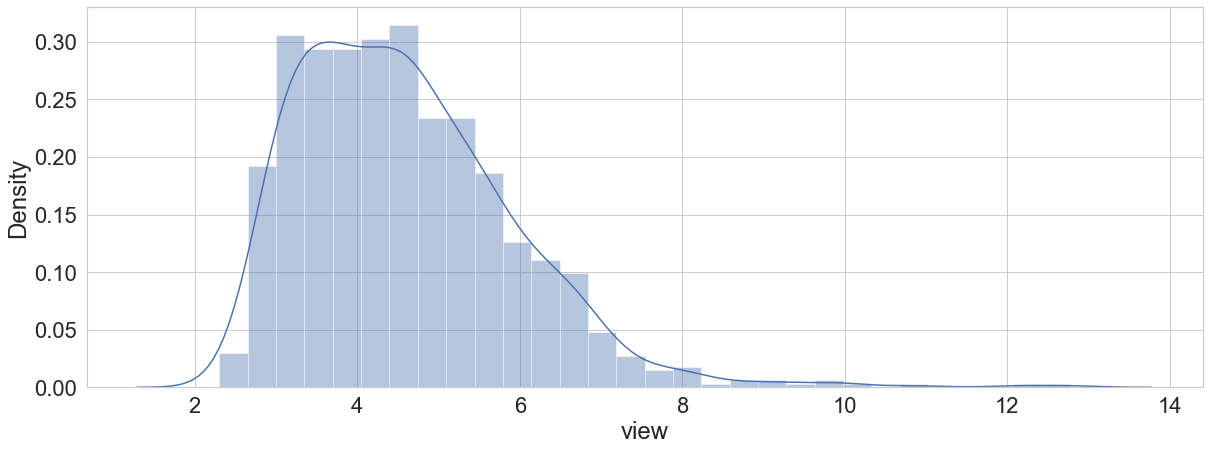

In [102]:
sns.distplot(np.log(pivot_ads_w_na.view))

Step 4 <a href='https://lab.karpov.courses/learning/85/module/1056/lesson/9043/26538/117986/'>link</a>
<br>–¢–µ–ø–µ—Ä—å –Ω—É–∂–Ω–æ –Ω–∞–π—Ç–∏ —Å—Ä–µ–¥–Ω–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ–∫–∞–∑–æ–≤ –Ω–∞ 1 –æ–±—ä—è–≤–ª–µ–Ω–∏–µ (ad_id) –ø–æ –¥–Ω—è–º, –Ω–µ —É—á–∏—Ç—ã–≤–∞—è –æ–±—ä—è–≤–ª–µ–Ω–∏—è, —É –∫–æ—Ç–æ—Ä—ã—Ö –Ω–µ –±—ã–ª–æ –ø–æ–∫–∞–∑–æ–≤ (–æ–±—ã—á–Ω–æ–µ —Å—Ä–µ–¥–Ω–µ–µ). –ü–æ—Å–ª–µ —ç—Ç–æ–≥–æ –ø–æ—Å—á–∏—Ç–∞–π—Ç–µ —Å–∫–æ–ª—å–∑—è—â–µ–µ —Å—Ä–µ–¥–Ω–µ–µ –ø–æ –ø–æ–ª—É—á–µ–Ω–Ω–æ–º—É —Ä–µ–∑—É–ª—å—Ç–∞—Ç—É —Å –æ–∫–Ω–æ–º –≤ 2 —ç–ª–µ–º–µ–Ω—Ç–∞.

–í–æ–ø—Ä–æ—Å: –ö–∞–∫–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ —Å–∫–æ–ª—å–∑—è—â–µ–≥–æ —Å—Ä–µ–¥–Ω–µ–≥–æ –ø–æ–ª—É—á–∏–º –∑–∞ 6 –∞–ø—Ä–µ–ª—è 2019 –≥–æ–¥–∞? –û–∫—Ä—É–≥–ª–∏—Ç–µ –æ—Ç–≤–µ—Ç –¥–æ —Ü–µ–ª–æ–≥–æ —á–∏—Å–ª–∞.

In [143]:
# mean_df = ads_data.query('event == "view"') \
#     .groupby(by=['ad_id','date'], as_index=False) \
#     .agg({'time':'count'}) \
#     .rename(columns={'time':'view_count'}) \
#     .groupby(by='date') \
#     .agg({'view_count':'mean'})

mean_df = ads_data.query('event == "view"') \
            .pivot_table(index='ad_id',
                        columns='date',
                        values='time',
                        aggfunc='count'
                        )

mean_df = mean_df.mean()

In [144]:
rolling_df = mean_df.rolling(2).mean().round()

rolling_df

date
2019-04-01      NaN
2019-04-02    146.0
2019-04-03    151.0
2019-04-04    420.0
2019-04-05    798.0
2019-04-06    598.0
dtype: float64

Step 5 <a href='https://lab.karpov.courses/learning/85/module/1056/lesson/9043/26538/117987/'>link</a>
<br>–°–∫–æ–ª—å–∑—è—â–µ–µ —Å—Ä–µ–¥–Ω–µ–µ —á–∞—Å—Ç–æ –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –¥–ª—è –ø–æ–∏—Å–∫–∞ –∞–Ω–æ–º–∞–ª–∏–π –≤ –¥–∞–Ω–Ω—ã—Ö. –î–∞–≤–∞–π—Ç–µ –ø–æ–ø—Ä–æ–±—É–µ–º –Ω–∞–Ω–µ—Å—Ç–∏ –Ω–∞ –æ–¥–∏–Ω –≥—Ä–∞—Ñ–∏–∫ –∑–Ω–∞—á–µ–Ω–∏—è –ø—Ä–æ—Å—Ç–æ —Å—Ä–µ–¥–Ω–µ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –ø–æ–∫–∞–∑–æ–≤ –ø–æ –¥–Ω—è–º –∏ —Å–∫–æ–ª—å–∑—è—â–µ–≥–æ —Å—Ä–µ–¥–Ω–µ–≥–æ –Ω–∞ –æ—Å–Ω–æ–≤–µ —ç—Ç–∏—Ö –¥–∞–Ω–Ω—ã—Ö (–∫–æ—Ç–æ—Ä–æ–µ –º—ã –ø–æ–ª—É—á–∏–ª–∏ –≤ –ø—Ä–æ—à–ª–æ–º –∑–∞–¥–∞–Ω–∏–∏).

–ü–æ—Å—á–∏—Ç–∞–π—Ç–µ, –≤ –∫–∞–∫–æ–π –¥–µ–Ω—å –Ω–∞–±–ª—é–¥–∞–µ—Ç—Å—è –Ω–∞–∏–±–æ–ª—å—à–∞—è —Ä–∞–∑–Ω–∏—Ü–∞ –ø–æ –º–æ–¥—É–ª—é –º–µ–∂–¥—É –∞—Ä–∏—Ñ–º–µ—Ç–∏—á–µ—Å–∫–∏–º —Å—Ä–µ–¥–Ω–∏–º –∏ —Å–∫–æ–ª—å–∑—è—â–∏–º —Å—Ä–µ–¥–Ω–∏–º? –î–Ω–∏, –≤ –∫–æ—Ç–æ—Ä—ã—Ö —Å–∫–æ–ª—å–∑—è—â–µ–µ —Å—Ä–µ–¥–Ω–µ–µ —Ä–∞–≤–Ω–æ NaN, –Ω–µ —É—á–∏—Ç—ã–≤–∞–µ–º. –ó–∞–ø–∏—à–∏—Ç–µ –æ—Ç–≤–µ—Ç –≤ —Ñ–æ—Ä–º–∞—Ç–µ yyyy-MM-dd

<AxesSubplot:xlabel='date'>

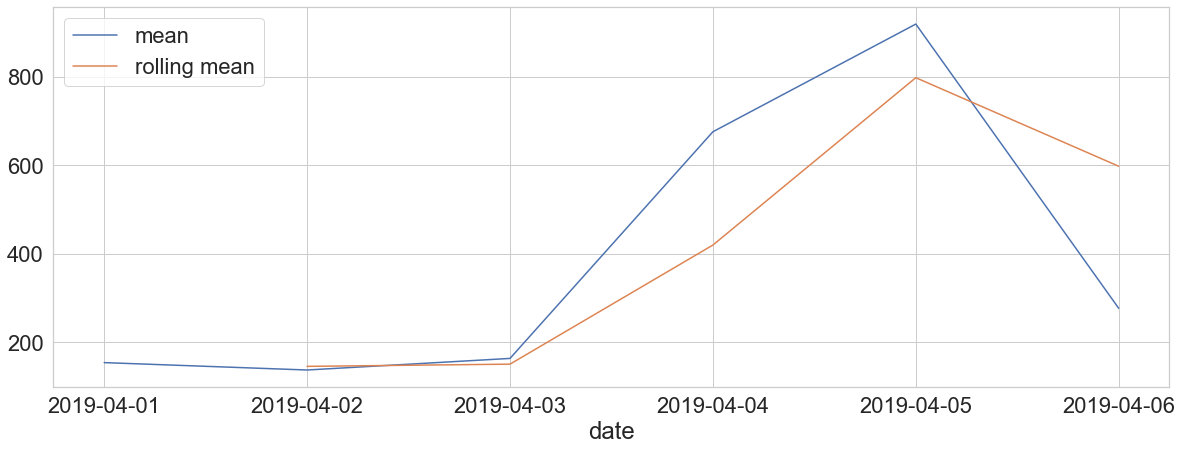

In [147]:
sns.lineplot(data = mean_df, markers=True, palette=['r'], label='mean')
sns.lineplot(data = rolling_df, markers=True, label='rolling mean')

In [153]:
mean_df.subtract(rolling_df).abs().idxmax()

Timestamp('2019-04-06 00:00:00')

Step 6 <a href='https://lab.karpov.courses/learning/85/module/1056/lesson/9043/26538/117988/'>link</a>
<br>–û–±—ä–µ–¥–∏–Ω–∏—Ç–µ –¥–∞–Ω–Ω—ã–µ —Ä–µ–∫–ª–∞–º—ã —Å –¥–∞–Ω–Ω—ã–º–∏ –æ —Ä–µ–∫–ª–∞–º–Ω—ã—Ö –∫–ª–∏–µ–Ω—Ç–∞—Ö –∏ –Ω–∞–π–¥–∏—Ç–µ —Å—Ä–µ–¥–Ω–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –¥–Ω–µ–π –æ—Ç –¥–∞—Ç—ã —Å–æ–∑–¥–∞–Ω–∏—è —Ä–µ–∫–ª–∞–º–Ω–æ–≥–æ –∫–ª–∏–µ–Ω—Ç–∞ (create_date) –∏ –ø–µ—Ä–≤—ã–º –∑–∞–ø—É—Å–∫–æ–º —Ä–µ–∫–ª–∞–º–Ω–æ–≥–æ –æ–±—ä—è–≤–ª–µ–Ω–∏—è —ç—Ç–∏–º –∫–ª–∏–µ–Ω—Ç–æ–º (date).

–í –∫–∞—á–µ—Å—Ç–≤–µ –æ—Ç–≤–µ—Ç–∞ —É–∫–∞–∂–∏—Ç–µ —Å—Ä–µ–¥–Ω–µ–µ —á–∏—Å–ª–æ –¥–Ω–µ–π.

In [168]:
ads_df = ads_data.groupby(by='client_union_id', as_index=False) \
    .agg({'date':'min'}) \
    .rename(columns={'date':'first_date'}) \
    .merge(ads_clients_data, on='client_union_id')

In [169]:
ads_df.head()

client_union_id first_date       date  community_id create_date
0                1 2019-04-01 2020-05-07    -130371893  2018-12-24
1                9 2019-04-03 2020-05-07    -130215524  2018-12-10
2               13 2019-04-02 2020-05-07    -130623793  2019-01-26
3               16 2019-04-03 2020-05-07    -130748007  2018-12-19
4               20 2019-04-02 2020-05-07    -130189700  2019-03-01

In [170]:
ads_df['diff_date'] = ads_df.create_date.subtract(ads_df.first_date).abs()

In [171]:
ads_df.diff_date.mean()

Timedelta('124 days 09:04:43.532219570')

Step 7 <a href='https://lab.karpov.courses/learning/85/module/1056/lesson/9043/26538/117989/'>link</a>
<br>üíÄ –°–ª–æ–∂–Ω–æ–µ –∑–∞–¥–∞–Ω–∏–µ! üíÄ

–î–∞–≤–∞–π—Ç–µ –≤—ã—á–∏—Å–ª–∏–º –∫–æ–Ω–≤–µ—Ä—Å–∏—é –∏–∑ —Å–æ–∑–¥–∞–Ω–∏—è —Ä–µ–∫–ª–∞–º–Ω–æ–≥–æ –∫–∞–±–∏–Ω–µ—Ç–∞ –≤ –∑–∞–ø—É—Å–∫ –ø–µ—Ä–≤–æ–π —Ä–µ–∫–ª–∞–º—ã –≤ —Ç–µ—á–µ–Ω–∏–µ –Ω–µ –±–æ–ª–µ–µ 365 –¥–Ω–µ–π.

–ö–æ–Ω–≤–µ—Ä—Å–∏—è ‚Äì –æ—Ç–Ω–æ—à–µ–Ω–∏–µ —á–∏—Å–ª–∞ –∫–ª–∏–µ–Ω—Ç–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ —Å–æ–≤–µ—Ä—à–∏–ª–∏ —Ü–µ–ª–µ–≤–æ–µ –¥–µ–π—Å—Ç–≤–∏–µ (—Å–æ–∑–¥–∞–ª–∏ —Ä–µ–∫–ª–∞–º—É), –∫ –æ–±—â–µ–º—É —á–∏—Å–ª—É –∫–ª–∏–µ–Ω—Ç–æ–≤. –ù–∞–ø—Ä–∏–º–µ—Ä, 1000 –∫–ª–∏–µ–Ω—Ç–æ–≤ —Å–æ–∑–¥–∞–ª–∏ –∫–∞–±–∏–Ω–µ—Ç, –Ω–æ –ª–∏—à—å 50 –∏–∑ –Ω–∏—Ö –∑–∞–ø—É—Å—Ç–∏–ª–∏ —Ä–µ–∫–ª–∞–º—É. –í —Ç–∞–∫–æ–º —Å–ª—É—á–∞–µ –∫–æ–Ω–≤–µ—Ä—Å–∏—è –±—É–¥–µ—Ç —Ä–∞–≤–Ω–∞

50 / 1000 ‚àó 100=5%

–ß—Ç–æ–±—ã –æ—Ç–æ–±—Ä–∞—Ç—å –¥–∞–Ω–Ω—ã–µ –∑–∞ –Ω—É–∂–Ω—ã–π –ø—Ä–æ–º–µ–∂—É—Ç–æ–∫, –º–æ–∂–Ω–æ –≤–æ—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è —Å—Ä–∞–≤–Ω–µ–Ω–∏–µ–º –≤—Ä–µ–º–µ–Ω–∏ –¥–æ —Å–æ–∑–¥–∞–Ω–∏—è –ø–µ—Ä–≤–æ–π —Ä–µ–∫–ª–∞–º—ã —Å pd.Timedelta(365, unit='day'))

–û—Ç–≤–µ—Ç –¥–∞–π—Ç–µ –≤ –ø—Ä–æ—Ü–µ–Ω—Ç–∞—Ö –∏ –æ–∫—Ä—É–≥–ª–∏—Ç–µ –¥–æ —Å–æ—Ç—ã—Ö. –ü—Ä–∏–º–µ—Ä –æ—Ç–≤–µ—Ç–∞:34.69

In [180]:
total_clients = ads_clients_data.client_union_id.nunique()

In [189]:
ads_up_365 = ads_df[ads_df.diff_date <= pd.Timedelta(365, unit='day')]
launch_ads_in_365 =ads_up_365.client_union_id.nunique()

In [190]:
np.round(launch_ads_in_365 / total_clients * 100, 2)

0.69

Step 8 <a href='https://lab.karpov.courses/learning/85/module/1056/lesson/9043/26538/117990/'>link</a>
<br>–î–∞–≤–∞–π—Ç–µ —Ä–∞–∑–æ–±—ä–µ–º –Ω–∞—à–∏—Ö –∫–ª–∏–µ–Ω—Ç–æ–≤ –ø–æ –ø—Ä–æ–º–µ–∂—É—Ç–∫–∞–º –æ—Ç —Å–æ–∑–¥–∞–Ω–∏—è —Ä–µ–∫–ª–∞–º–Ω–æ–≥–æ –∫–∞–±–∏–Ω–µ—Ç–∞ –¥–æ –∑–∞–ø—É—Å–∫–∞ –ø–µ—Ä–≤–æ–≥–æ —Ä–µ–∫–ª–∞–º–Ω–æ–≥–æ –æ–±—ä—è–≤–ª–µ–Ω–∏—è.

–û–ø—Ä–µ–¥–µ–ª–∏—Ç–µ, —Å–∫–æ–ª—å–∫–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∫–ª–∏–µ–Ω—Ç–æ–≤ –∑–∞–ø—É—Å—Ç–∏–ª–∏ —Å–≤–æ–µ –ø–µ—Ä–≤–æ–µ –æ–±—ä—è–≤–ª–µ–Ω–∏–µ –≤ –ø–µ—Ä–≤—ã–π –º–µ—Å—è—Ü —Å–≤–æ–µ–≥–æ —Å—É—â–µ—Å—Ç–≤–æ–≤–∞–Ω–∏—è (–æ—Ç 0 –¥–æ 30 –¥–Ω–µ–π). –°–ø–∏—Å–æ–∫ –ø—Ä–æ–º–µ–∂—É—Ç–∫–æ–≤ –¥–Ω–µ–π –¥–ª—è –º–µ—Ç–æ–¥–∞ pd.cut() ‚Äì [0, 30, 90, 180, 365]. –°–æ–∑–¥–∞—Ç—å –≤—Ä–µ–º–µ–Ω–Ω—ã–µ –ø—Ä–æ–º–µ–∂—É—Ç–∫–∏ –º–æ–∂–Ω–æ —Å –ø–æ–º–æ—â—å—é pd.to_timedelta().

In [192]:
days = [pd.to_timedelta(d, unit='day') for d in [0, 30, 90, 180, 365]]
labels = ['1month', '3month', '6month', 'year']

In [193]:
ads_df['diff_cut'] = pd.cut(ads_up_365.diff_date, bins=days, labels=labels)

In [194]:
ads_df.head()

client_union_id first_date       date  community_id create_date diff_date  \
0                1 2019-04-01 2020-05-07    -130371893  2018-12-24   98 days   
1                9 2019-04-03 2020-05-07    -130215524  2018-12-10  114 days   
2               13 2019-04-02 2020-05-07    -130623793  2019-01-26   66 days   
3               16 2019-04-03 2020-05-07    -130748007  2018-12-19  105 days   
4               20 2019-04-02 2020-05-07    -130189700  2019-03-01   32 days   

  diff_cut  
0   6month  
1   6month  
2   3month  
3   6month  
4   3month

In [198]:
#ads_df.query('diff_cut == "1month"').client_union_id.nunique()
count_clients = ads_df.groupby(by='diff_cut') \
    .agg({'client_union_id':'nunique'})

count_clients

client_union_id
diff_cut                 
1month                 11
3month                263
6month                396
year                  168

Step 9 <a href='https://lab.karpov.courses/learning/85/module/1056/lesson/9043/26538/117991/'>link</a>
<br>–ò –ø–æ—Å–ª–µ–¥–Ω–µ–µ –∑–∞–¥–∞–Ω–∏–µ: –ø–æ—Å—Ç—Ä–æ–π—Ç–µ –∏–Ω—Ç–µ—Ä–∞–∫—Ç–∏–≤–Ω—ã–π –±–∞—Ä–ø–ª–æ—Ç, –Ω–∞ –∫–æ—Ç–æ—Ä–æ–º –±—É–¥—É—Ç –ø–æ–∫–∞–∑–∞–Ω—ã –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ —Å –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∫–ª–∏–µ–Ω—Ç–æ–≤ –≤ –Ω–∏—Ö (—Ç–æ, —á—Ç–æ —É –≤–∞—Å –ø–æ–ª—É—á–∏–ª–æ—Å—å –Ω–∞ –ø—Ä–æ—à–ª–æ–º —Å—Ç–µ–ø–µ, –ø–æ –∑–∞–ø—É—Å–∫—É –ø–µ—Ä–≤–æ–≥–æ —Ä–µ–∫–ª–∞–º–Ω–æ–≥–æ –æ–±—ä—è–≤–ª–µ–Ω–∏—è). –†–∞—Å–ø–æ–ª–æ–∂–∏—Ç–µ –∏—Ö —Ç–∞–∫, —á—Ç–æ–±—ã –≤–Ω–∏–∑—É –±—ã–ª–∞ —Å–∞–º–∞—è –º–∞–ª–æ—á–∏—Å–ª–µ–Ω–Ω–∞—è, –∞ –Ω–∞–≤–µ—Ä—Ö—É ‚Äì —Å–∞–º–∞—è –±–æ–ª—å—à–∞—è.

In [203]:
fig = go.Figure(px.bar(count_clients))

fig.update_layout(xaxis={'categoryorder':'total ascending'})
fig.show()